In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [13]:
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')


In [14]:
data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [17]:
print(data.head())
print(data.describe())
print(data.info)


  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
               temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.33

In [18]:
# Drop missing values
data.dropna(inplace=True)

# Drop duplicates
data.drop_duplicates(inplace=True)

# Convert date_time column to datetime format
data['date_time'] = pd.to_datetime(data['date_time'])

# Extract features from date_time column
data['hour'] = data['date_time'].dt.hour
data['weekday'] = data['date_time'].dt.weekday

# Select relevant features for training
features = ['hour', 'weekday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']
X = data[features]
y = data['traffic_volume']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [21]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: {:.2f}'.format(mse))
print('R2 score: {:.2f}'.format(r2))


Mean squared error: 44020493.68
R2 score: -10.01


In [22]:
new_data = np.array([[10, 3, 22.0, 0.0, 0.0, 90.0]])
prediction = model.predict(new_data)
print('Predicted traffic volume: {:.2f}'.format(prediction[0]))


Predicted traffic volume: -582.31


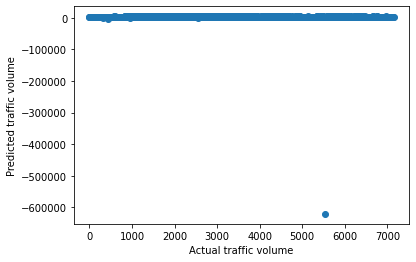

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual traffic volume')
plt.ylabel('Predicted traffic volume')
plt.show()


In [24]:
import pickle
# Save the model to a pickle file
with open('traffic_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [25]:
from sklearn.preprocessing import StandardScaler


# Fit a scaler to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Save the scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)